In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
!pip install matplotlib

In [3]:
df = pd.read_csv("Covid19india.csv")
df

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Date,Month,Year
0,0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,30,1,2020
1,1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,2,2,2020
2,2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,3,2,2020
3,3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,2,3,2020
4,4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145844,22790,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,DN,Hospitalized,7,7,2020
145845,22791,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,SK,Recovered,7,7,2020
145846,22792,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,SK,Recovered,7,7,2020
145847,22793,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,KL,Recovered,7,7,2020


In [4]:
data = df.iloc[:,1:]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Date,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
145844,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,DN,Hospitalized,7,7,2020
145845,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,SK,Recovered,7,7,2020
145846,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,SK,Recovered,7,7,2020
145847,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,KL,Recovered,7,7,2020


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145849 entries, 0 to 145848
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Num Cases          145846 non-null  float64
 1   Date Announced     145849 non-null  object 
 2   Age Bracket        60013 non-null   object 
 3   Gender             62808 non-null   object 
 4   Detected City      10949 non-null   object 
 5   Detected District  137451 non-null  object 
 6   Detected State     145840 non-null  object 
 7   State code         145840 non-null  object 
 8   Current Status     145847 non-null  object 
 9   Date               145849 non-null  int64  
 10  Month              145849 non-null  int64  
 11  Year               145849 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 13.4+ MB


In [14]:
data.isnull().sum(axis=0).sort_values(ascending = False)/len(data)*100
round(data.isnull().sum(axis=0).sort_values(ascending = False)/len(data)*100,2)

Detected City        92.49
Age Bracket          58.85
Gender               56.94
Detected District     5.76
Detected State        0.01
State code            0.01
Num Cases             0.00
Current Status        0.00
Date Announced        0.00
Date                  0.00
Month                 0.00
Year                  0.00
dtype: float64

In [17]:
data.isnull().sum(axis=1).sort_values(ascending=False)

28451     7
69008     7
69009     7
28398     6
28968     6
         ..
123250    0
123251    0
123252    0
11680     0
0         0
Length: 145849, dtype: int64

In [18]:
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Date,Month,Year
0,1.0,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,30,1,2020
1,1.0,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,2,2,2020
2,1.0,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,3,2,2020
3,1.0,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,2,3,2020
4,1.0,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,2,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
145844,2.0,07/07/2020,NaN,NaN,NaN,Dadra and Nagar Haveli,Dadra and Nagar Haveli and Daman and Diu,DN,Hospitalized,7,7,2020
145845,-9.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,SK,Recovered,7,7,2020
145846,-6.0,07/07/2020,NaN,NaN,NaN,NaN,Sikkim,SK,Recovered,7,7,2020
145847,-1.0,07/07/2020,NaN,NaN,NaN,Kozhikode,Kerala,KL,Recovered,7,7,2020


In [20]:
data.groupby('Month')['Num Cases'].sum()

Month
1         1.0
2         2.0
3      1635.0
4     36078.0
5    242853.0
6    663178.0
7    270185.0
Name: Num Cases, dtype: float64

In [33]:
M = data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()
M

Month
3      1431.0
4     33209.0
5    155781.0
6    395144.0
7    157701.0
Name: Num Cases, dtype: float64

<AxesSubplot:xlabel='Month'>

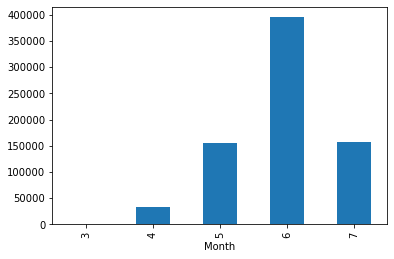

In [36]:
M.plot.bar()

In [37]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F             21294.0
M             42795.0
M                 1.0
Non-Binary       12.0
Name: Num Cases, dtype: float64

In [42]:
M = data.groupby('Age Bracket')['Num Cases'].sum().sort_values(ascending=False).head(10)

<AxesSubplot:xlabel='Age Bracket'>

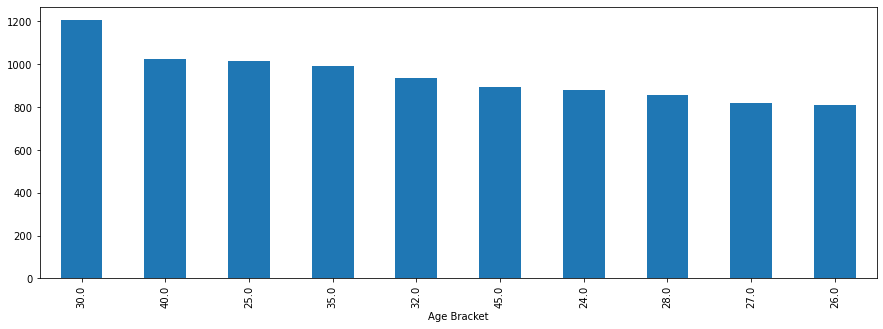

In [43]:
M.plot.bar(figsize=(15,5))

In [48]:
M = data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='Detected State'>

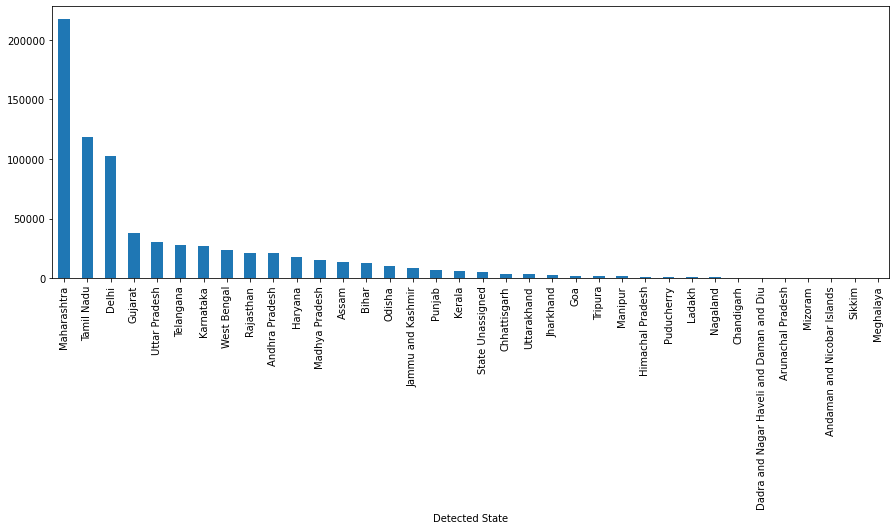

In [56]:
M.plot.bar(figsize=(15,5))

In [60]:
Dat = data[data['Current Status']=='Hospitalized'].groupby(['Month','Date'])[['Num Cases']].sum()
Dat

Num Cases
Month Date           
3     4           5.0
      5           1.0
      7           2.0
      9           4.0
      10          4.0
...               ...
7     3       22718.0
      4       24018.0
      5       23942.0
      6       22500.0
      7       23147.0

[124 rows x 1 columns]

array([<AxesSubplot:title={'center':'(Num Cases, 3)'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'(Num Cases, 4)'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'(Num Cases, 5)'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'(Num Cases, 6)'}, xlabel='Date'>,
       <AxesSubplot:title={'center':'(Num Cases, 7)'}, xlabel='Date'>],
      dtype=object)

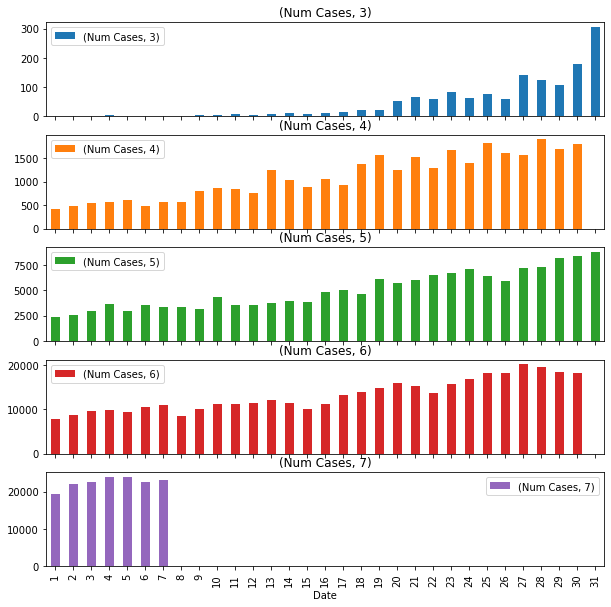

In [62]:
Dat.unstack(level=0).plot(kind='bar',subplots=True,figsize=(10,10))

In [63]:
data['Current Status'].unique()

array(['Recovered', 'Hospitalized', 'Deceased', 'Migrated',
       'Migrated_Other', nan, 'Migrated_other'], dtype=object)

In [65]:
data[data['Current Status']=='Deceased']['Num Cases'].sum()

19817.0

In [67]:
data[data['Current Status']=='Deceased'].groupby('Detected State')['Num Cases'].sum().sort_values(ascending=False)

Detected State
Maharashtra                                 8919.0
Delhi                                       3112.0
Gujarat                                     1831.0
Tamil Nadu                                  1613.0
Uttar Pradesh                                798.0
West Bengal                                  787.0
Madhya Pradesh                               521.0
Rajasthan                                    432.0
Karnataka                                    409.0
Telangana                                    289.0
Haryana                                      276.0
Andhra Pradesh                               221.0
Punjab                                       159.0
Jammu and Kashmir                            138.0
Bihar                                         97.0
Odisha                                        54.0
Uttarakhand                                   43.0
Kerala                                        27.0
Jharkhand                                     19.0
Assam           